# CodeBasics

### Single Variable

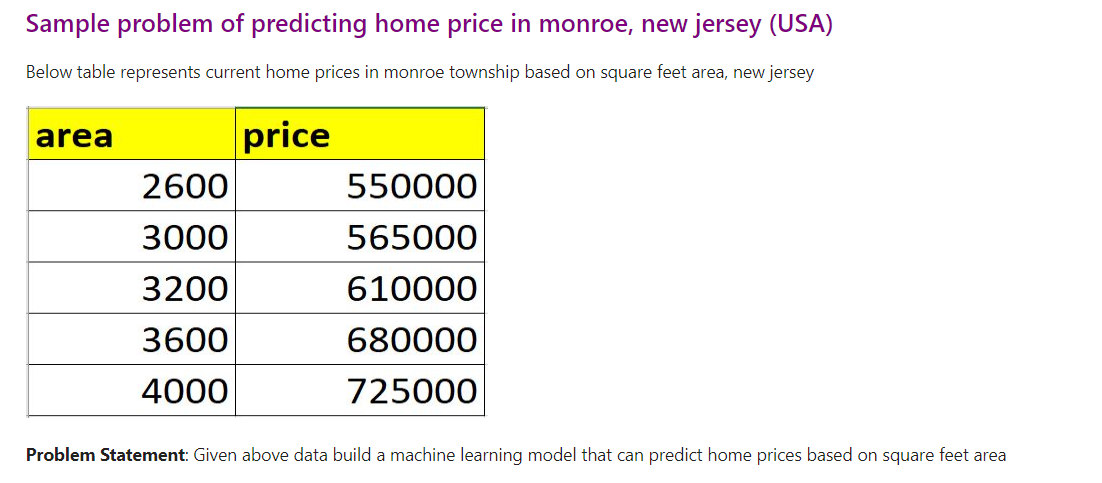

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


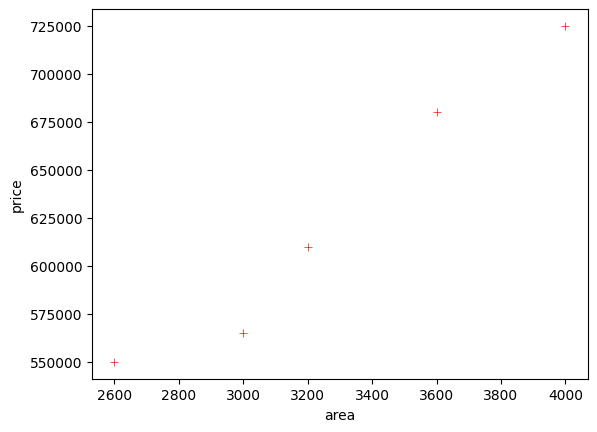

In [4]:
sns.scatterplot(df,x="area",y="price",color="red",marker="+")
plt.xlabel('area')
plt.ylabel('price')
plt.show()

In [5]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(df[["area"]],df[["price"]])

LinearRegression()

(1) Predict price of a home with area = 3300 sqr ft

In [6]:
reg.predict([[3300]])

C:\Users\SPPL IT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[628715.75342466]])

In [10]:
reg.predict([[5000]])

C:\Users\SPPL IT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[859554.79452055]])

 ^y=mx+c

In [11]:
reg.coef_

array([[135.78767123]])

In [12]:
reg.intercept_

array([180616.43835616])

y=mx+c 

-> y= 135.78767123 * 5000 + 180616.43835616

So, y == 859554.794

In [13]:
135.78767123 * 5000 + 180616.43835616

859554.7945061601

In [15]:
area_df = pd.read_csv('areas.csv')
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [16]:
reg.predict(area_df)

array([[ 316404.10958904],
       [ 384297.94520548],
       [ 492928.08219178],
       [ 661304.79452055],
       [ 740061.64383562],
       [ 799808.21917808],
       [ 926090.75342466],
       [ 650441.78082192],
       [ 825607.87671233],
       [ 492928.08219178],
       [1402705.47945205],
       [1348390.4109589 ],
       [1144708.90410959]])

In [17]:
area_df[["price"]]=reg.predict(area_df)

In [18]:
area_df

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


## Exercise 
Predict canada's per capita income in year 2020. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020

In [20]:
canada_df= pd.read_csv("canada_per_capita_income.csv")
canada_df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [21]:
model=linear_model.LinearRegression()

In [22]:
model.fit(canada_df[["year"]],canada_df[["per capita income (US$)"]])

LinearRegression()

In [24]:
model.predict([[2020]])

C:\Users\SPPL IT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[41288.69409442]])

## Linear Regression Multiple Variables

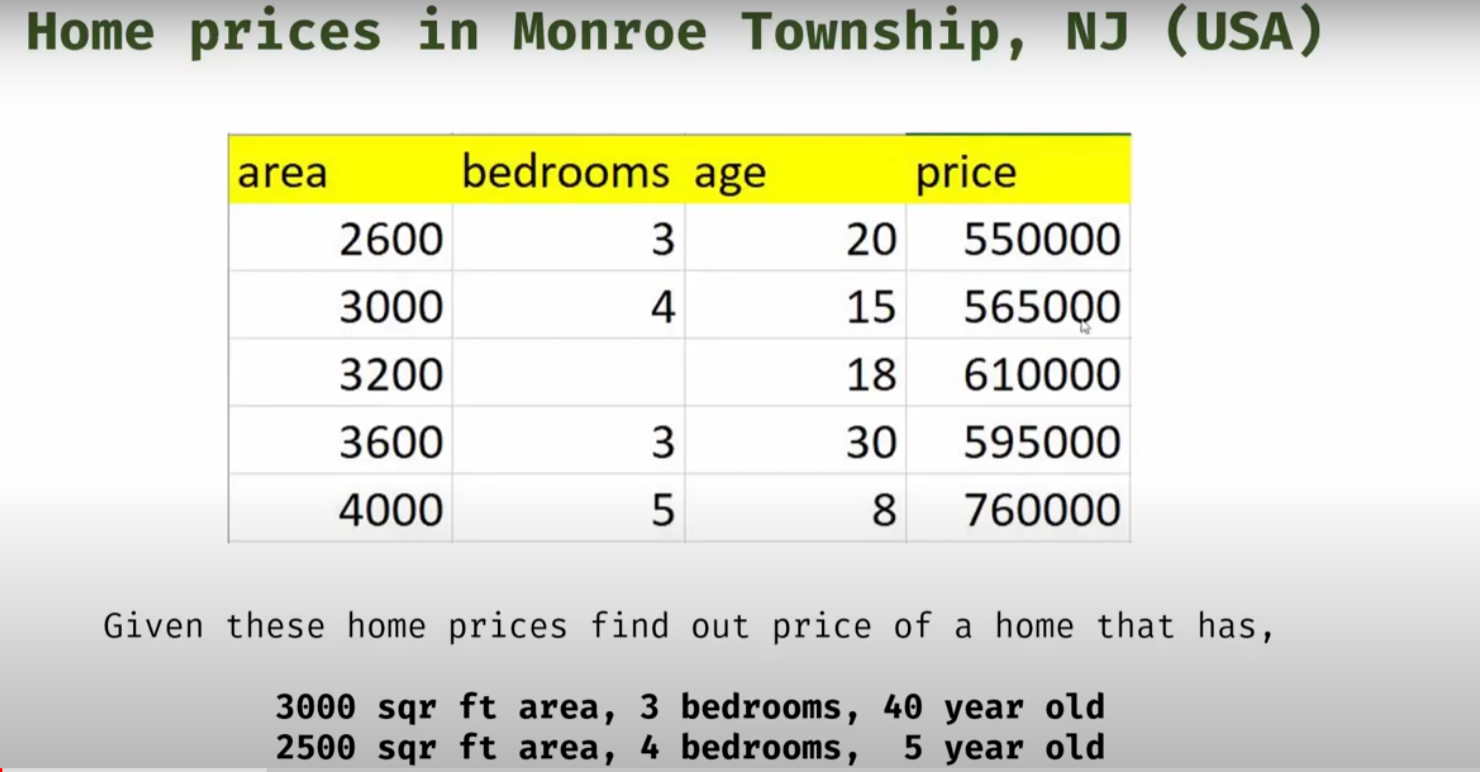

#### price = m₁ * area + m2 * bedrooms + m3 * age + c

y = m1x1 + M2X2 + M3X3 + c

In [26]:
home_price=pd.read_csv("multifactor_homeprices.csv")
home_price

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [30]:
home_price["bedrooms"].median()

np.float64(4.0)

In [32]:
home_price["bedrooms"].fillna(home_price["bedrooms"].median(),inplace=True)

In [33]:
home_price

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [34]:
model=linear_model.LinearRegression()

In [36]:
model.fit(home_price[["area", "bedrooms", "age"]],home_price[["price"]])

LinearRegression()

In [38]:
model.predict([[3000,3,40]])

C:\Users\SPPL IT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[498408.25158031]])

In [39]:
model.coef_

array([[  112.06244194, 23388.88007794, -3231.71790863]])

In [40]:
model.intercept_

array([221323.0018654])

In [41]:
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

498408.25157402386

In [42]:
model.predict([[2500,4,5]])

C:\Users\SPPL IT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[578876.03748933]])

## Exercise 
In the hiring.csv. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine leaming model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates. 

2 yr experience, 9 test score, 6 interview score 

12 yr experience, 10 test score, 10 interview score

In [58]:
hiring_df= pd.read_csv("hiring.csv")
hiring_df


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [59]:
hiring_df["experience"] = hiring_df["experience"].fillna("zero")
hiring_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [60]:
import numpy as np

hiring_df["test_score(out of 10)"] = hiring_df["test_score(out of 10)"].fillna(np.floor(hiring_df["test_score(out of 10)"].mean()))


In [61]:
hiring_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [63]:
from word2number import w2n

In [64]:
hiring_df.experience = hiring_df.experience.apply(w2n.word_to_num)
hiring_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [65]:
model=linear_model.LinearRegression()

In [69]:
model.fit(hiring_df[['experience','test_score(out of 10)','interview_score(out of 10)']],hiring_df['salary($)'])

LinearRegression()

2 yr experience, 9 test score, 6 interview score 

In [70]:
model.predict([[2,9,6]])

C:\Users\SPPL IT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

12 yr experience, 10 test score, 10 interview score

In [71]:
model.predict([[12,10,10]])

C:\Users\SPPL IT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])

# Krish Naik

### Simple Linear Reg.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

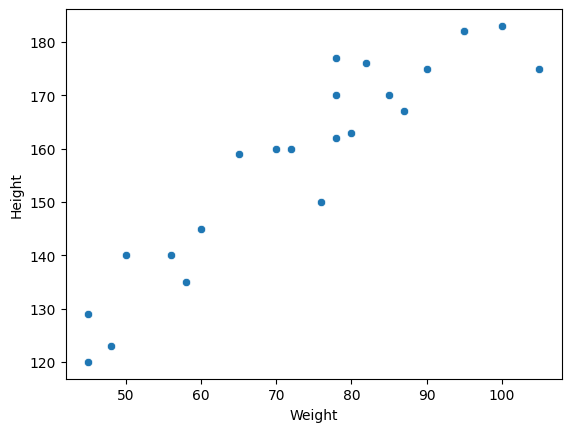

In [3]:
sns.scatterplot(data=df,x="Weight",y="Height")
plt.xlabel("Weight")
plt.ylabel("Height")

In [4]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


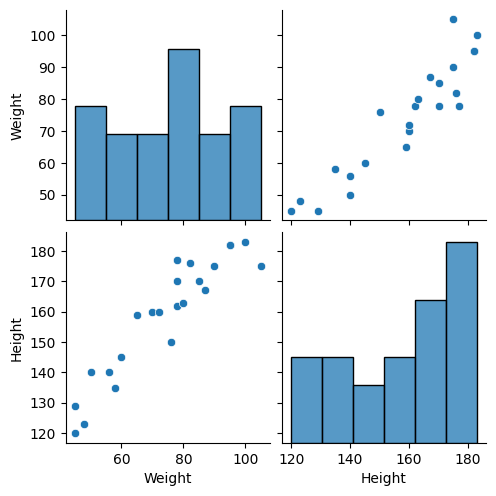

In [5]:
sns.pairplot(df)

In [6]:
## Independent and Dependent Feature
X=df[["Weight"]] ##Independent feature should be dataframe or 2-dimensional array
X.head(2)

,Weight
0,45
1,58


In [7]:
y=df["Height"] ##dependent feature can be in series
y.head(2)

0    120
1    135
Name: Height, dtype: int64

In [8]:
## Train Test Split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
## Standardization using Z-Score on Independent Feature
# Why independent? Bcz Gradient Descent gets applied, 
# on Independent Feature
from sklearn.preprocessing import StandardScaler


In [12]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

Now we need to standardize test data but for this we dont use fit_transform but instead we use transform bcz this needs to be done with same mean and SD , this is done to prevent data leakage.. we dont want our test data to know any info about the training data

In [ ]:
# Standardize the training data
# Compute mean and std from training data and scale it
###X_train_scaled = scaler.fit_transform(X_train)

# Standardize the test data
# Scale test data using mean and std from training data
###X_test_scaled = scaler.transform(X_test)

# Explanation:
# - We use fit_transform on training data to learn scaling parameters.
# - We use transform on test data to apply the same scaling.
# - This prevents data leakage from test data into the training process.
# - Using training parameters on test data is acceptable and necessary for consistency.
# - The model remains unaware of test data during training.


In [13]:
X_test=scaler.transform(X_test)

In [14]:
## Apply Simple Linear Regression ##
from sklearn.linear_model import LinearRegression

In [23]:
regression=LinearRegression(n_jobs=-1)

**n_jobs** in LinearRegression allows you to control the number of CPU cores used for training.
Setting **n_jobs=-1** tells the model to use all available cores, potentially speeding up computation.

In [24]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [25]:
regression.coef_

array([17.2982057])

In [26]:
regression.intercept_

np.float64(156.47058823529412)

**Formula:** $y = \beta_0 + \beta_1 x$

**Explanation:** For each one-unit increase in $x$, $y$ increases by **17.298** units. The intercept $\beta_0 = 156.471$ indicates the value of $y$ when $x = 0$.


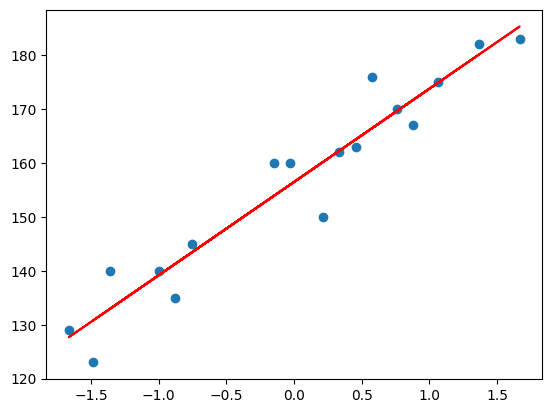

In [31]:
## Plot training data,best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color="r")

### prediction of test dată 
 1. predicted height output intercept +coef_(Weights) 
  2. y_pred_test =156.470 + 17.29(X_test)

In [33]:
## Prediction for test data
y_predict=regression.predict(X_test)

In [34]:
## Performance Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [35]:
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


**MSE (114.84):** The model has larger squared errors, indicating the average squared difference between predictions and actual values is relatively high.

**MAE (9.67):** On average, the model's predictions are off by about 9.67 units.

**RMSE (10.72):** The model's predictions deviate by approximately 10.72 units, with more weight on larger errors.

In [36]:
from sklearn.metrics import r2_score

In [37]:
score=r2_score(y_test,y_predict)
score

0.7360826717981276

In [40]:
len(X_test)

6

In [42]:
X_test.shape[1]

1

In [43]:
# Calculate Adjusted R²=1 - (1 - r2) * (n - 1) / (n - p - 1)
adj_r2 = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
adj_r2

0.6701033397476595

## OLS Linear Regression

In [44]:
## OLS Linear Regression

import statsmodels.api as sm

sm.ols(targer_variable,independent_variable)

In [45]:
model=sm.OLS(y_train,X_train).fit()

In [46]:
prediction=model.predict(X_test)
prediction

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

These are the predicted values for the dependent variable based on the X_test data. Each value in the array corresponds to a prediction for a specific observation in the test set.

In [49]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sun, 15 Sep 2024   Prob (F-statistic):                       0.664
Time:                        20:34:03   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\SPPL IT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [53]:
## Prediction For New Data
regression.predict(scaler.transform([[72]]))

C:\Users\SPPL IT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])

## Multiple Linear Regression

In [54]:
df_index=pd.read_csv("economic_index.csv")
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [55]:
df_index=df_index.drop(columns=["Unnamed: 0","year","month"],axis=1)
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [57]:
## Checking Null Value
df_index.isna().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

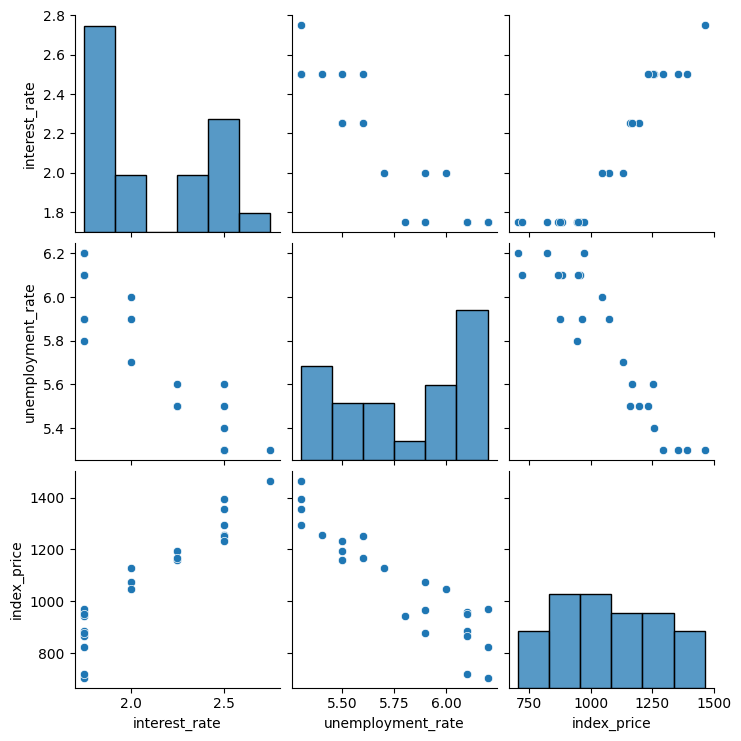

In [58]:
## Visualization 
sns.pairplot(df_index)

In [59]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [61]:
## Independent and dependent Features
X=df_index[['interest_rate','unemployment_rate']]
y=df_index.iloc[:,-1]

In [62]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [63]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [64]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

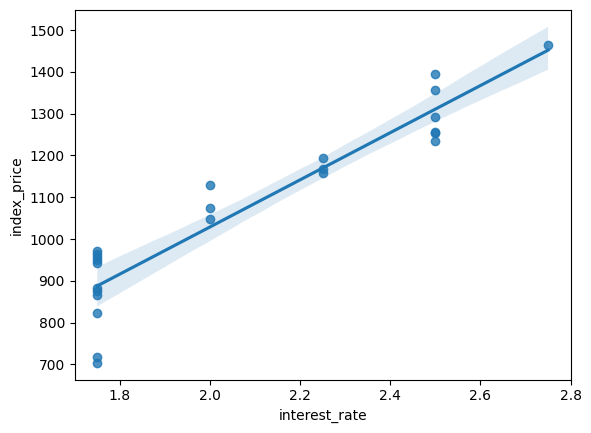

In [66]:
sns.regplot(data=df_index,x=df_index["interest_rate"],y=df_index["index_price"])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

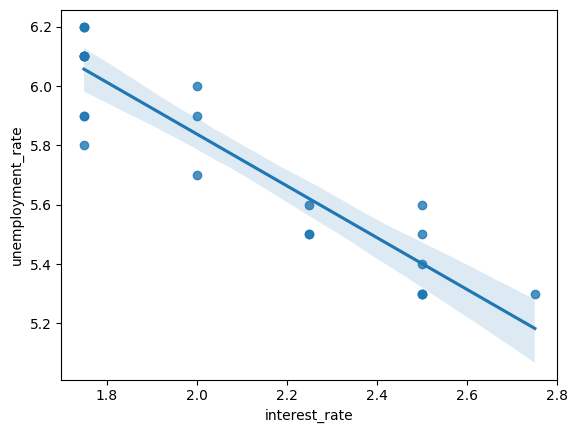

In [68]:
sns.regplot(data=df_index,x=df_index["interest_rate"],y=df_index["unemployment_rate"])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

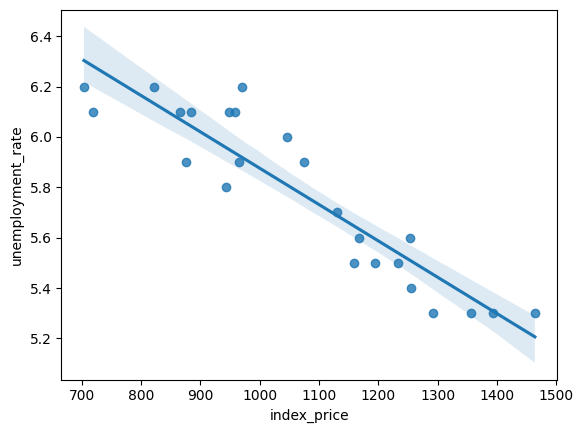

In [69]:
sns.regplot(data=df_index,x=df_index["index_price"],y=df_index["unemployment_rate"])

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [73]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression() 

In [74]:
regression.fit(X_train,y_train)

LinearRegression()

### Cross Val

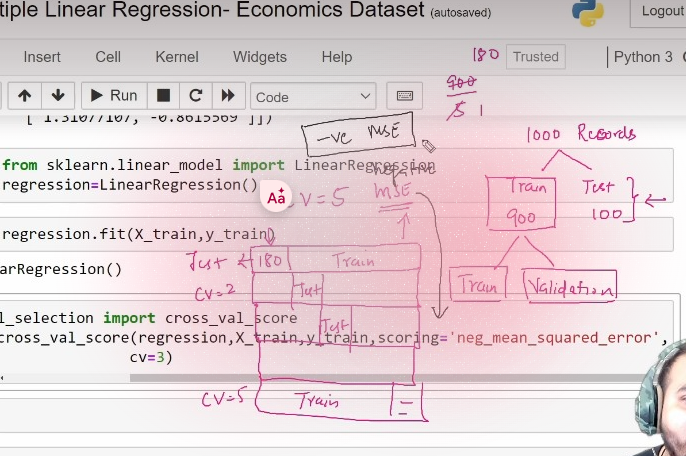

In [75]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",
                                cv=3 )

The cross_val_score function from the sklearn.model_selection module is used to evaluate a model by cross-validation. Here’s a breakdown of the parameters used in your code:

**regression:** This is the estimator object (e.g., a regression model) that you want to evaluate.

**X_train:** The input features used to train the model.

**y_train:** The target variable associated with the input features.

**scoring="neg_mean_squared_error":** This specifies the scoring metric to evaluate the model. In this case, it uses the negative mean squared error (MSE). The negative sign is used because cross_val_score expects a score where higher is better, but **MSE is a loss function where lower is better.**

**cv=3:** This specifies the number of folds in the cross-validation. Here, it uses 3-fold cross-validation, meaning the data is split into 3 parts, and the model is trained and evaluated 3 times, each time using a different part as the validation set and the remaining parts as the training set.

In [77]:
np.mean(validation_score) ##Mean validation score

np.float64(-5914.828180162386)

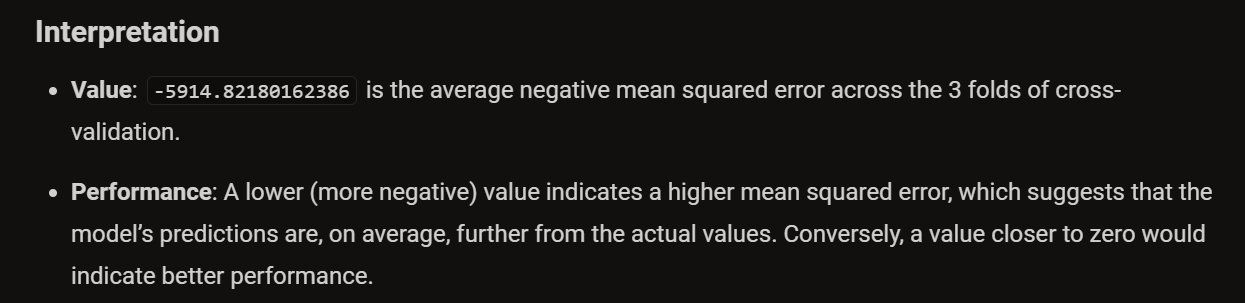

In [78]:
##Prediction
y_predict=regression.predict(X_test)
y_predict

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [79]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [80]:
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [82]:
## r^2 and adj r^2 
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predict)
print(score)
adj_r2 = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print(adj_r2)

0.7591371539010257
0.5985619231683761


## Assumptions


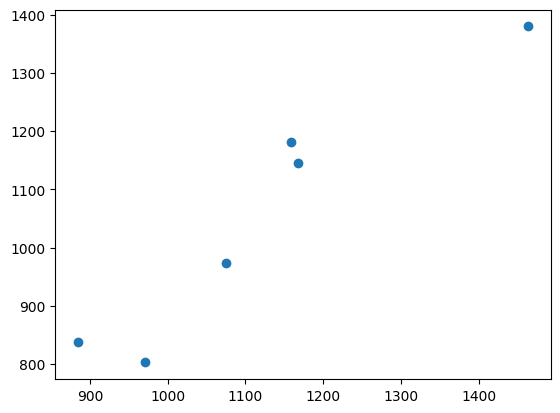

In [83]:
plt.scatter(y_test,y_predict)

In [84]:
residuals=y_test-y_predict ## Erros
residuals

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

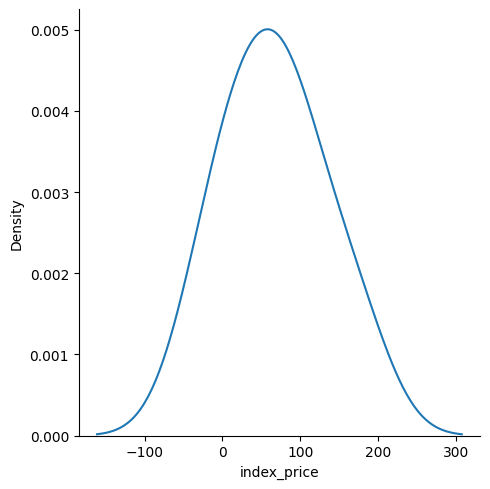

In [85]:
## Plot the residuals
sns.displot(residuals,kind="kde")

If this kind of plot is coming then the model we created can be considered as good 

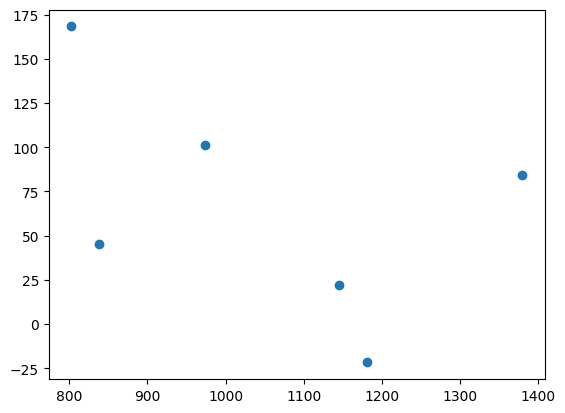

In [86]:
## Scatter plot with respect to prediction and residuals
plt.scatter(y_predict,residuals)

Uniformly distributed , no patterns meaning there is no prblm

## OLS

In [87]:
## OLS Linear Regression

import statsmodels.api as sm

In [88]:
model=sm.OLS(y_train,X_train).fit()

In [89]:
model.summary()

C:\Users\SPPL IT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 15 Sep 2024   Prob (F-statistic):                       0.754
Time:                        22:05:07   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
## Checking OLS with sklearn
print(regression.coef_)
print(regression.intercept_)

[  88.27275507 -116.25716066]
1053.4444444444443
